## Kernel

A kernel, convolution matrix, or mask is a small matrix. It is used for blurring, sharpening, embossing, edge detection, and more. This is accomplished by doing a convolution between a kernel and an image.

In [4]:
from skimage import io
import cv2
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'gray')

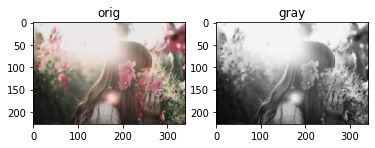

In [12]:
Img_orig  =  io.imread ( '/content/background.jpg' )
Img_gray  =  cv2.cvtColor ( Img_orig , cv2 . COLOR_RGB2GRAY )
plt . subplot ( 1 , 2 , 1 ); plt . imshow ( Img_orig ); plt . title ( 'orig' )
plt . subplot ( 1 , 2 , 2);plt . imshow ( Img_gray , cmap = 'gray' ); plt . title ( 'gray' )

Apply a smoothing filter (10x10) to the noise image.

The smoothing filter is a filter that outputs the average value of the pixels in the filter

Increasing the kernel size will eliminate the noise and at the same time blur the image

(227, 341, 3)


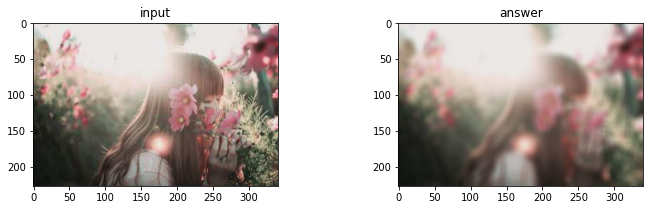

In [20]:
# opencv
img_smoth = cv2.blur(Img_orig, (10, 10)) # smoothing filtering
print(img_smoth.shape)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(Img_orig)
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_smoth)
plt.show()

In [33]:
import numpy as np
from cv2 import filter2D

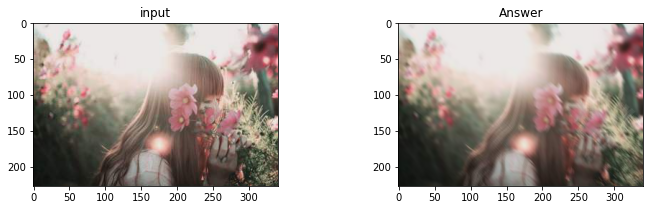

In [41]:
def  filter_motion ( img , K_size = ( 3 , 3 )):
     kernel  =  np.zeros ( K_size ) 
     kernel [ range ( K_size [ 0 ]), range ( K_size [ 0 ])] =  1  /  K_size [ 0 ]
     return  cv2.filter2D ( img , - 1 ,kernel )
img_motion  =  filter_motion ( Img_orig , K_size = ( 5 , 5 ))

plt . figure ( figsize = ( 12 , 3 ))
plt . subplot ( 1 , 2 , 1 ); plt . title ( 'input' ); plt . imshow ( Img_orig )
plt . subplot ( 1 , 2 , 2 ); plt . title ( 'Answer' ); plt . imshow ( img_motion)
plt . show ()

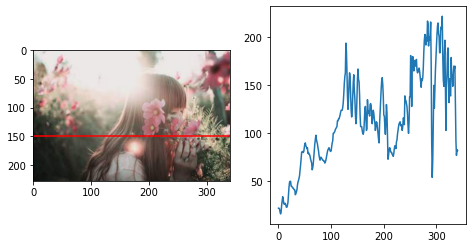

In [44]:
_w  =  Img_orig . shape [ 1 ]
plt . figure ( figsize = ( 12 , 4 ))
plt . subplot ( 1 , 3 , 1 ); plt . imshow ( Img_orig ); plt . plot ( np . arange ( _w ), [ 150 ] *  _w , color = 'red' )
plt. subplot ( 1 , 3 , 2 ); plt . plot ( np . arange ( _w ), Img_orig [ 150 , :, 0 ])
plt . show ()

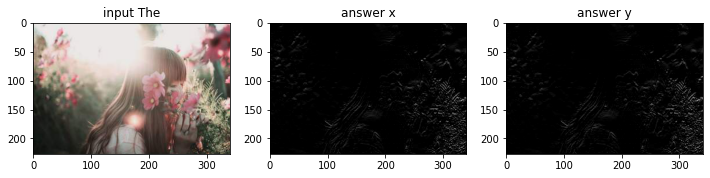

In [72]:
kernel=[]
def Filter_diff( Img , Mode = 'Y' ):
     kernel  =  np . array ([[ 0 , 0 , 0 ], [ - 1 , 1 , 0 ], [ 0 , 0 , 0 ]])
     if Mode  ==  'Y' :
       kernel  =  np.array ([[ 0 , - 1 , 0 ], [ 0, 1 , 0 ], [ 0 , 0 , 0 ]])
     return  cv2 . filter2D ( Img , - 1 , kernel )

img_diff_x  =  Filter_diff ( Img_gray )
img_diff_y  =  Filter_diff ( Img_gray )

plt . figure ( figsize = ( 12 , 3 ))
plt . subplot ( 1 , 3 , 1 ); plt . title ( 'input The' ); plt . imshow ( Img_orig , cmap = 'gray' )
plt . subplot ( 1 , 3 , 2 ); plt . title ( 'answer x' ); plt. imshow ( img_diff_x , cmap = 'gray' )
plt . subplot ( 1 , 3 , 3 ); plt . title ( 'answer y' ); plt . imshow ( img_diff_y , cmap = 'gray' )
plt.show()